In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #Import scikit-Tree For Decision Tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import time


D:\Users\sourc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_o = pd.read_csv("../data/processed/data_oversampled.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

df_n

X         Y  Orientation       Dir  PossessionTeamAbbrCode  \
0      0.599181  0.503250     0.585278  0.867408                0.645161   
1      0.395175  0.275784     0.391167  0.616671                0.645161   
2      0.225216  0.502119     0.095194  0.438733                0.483871   
3      0.273373  0.441650     0.415917  0.566296                0.645161   
4      0.159217  0.454366     0.571111  0.783829                0.645161   
...         ...       ...          ...       ...                     ...   
45059  0.228584  0.374965     0.254472  0.145013                0.677419   
45060  0.416295  0.565979     0.982194  0.110475                0.483871   
45061  0.620665  0.326363     0.393111  0.577577                0.709677   
45062  0.434320  0.484035     0.683778  0.653070                0.612903   
45063  0.553118  0.582650     0.763917  0.819617                0.741935   

       HomeScoreBeforePlay  VisitorScoreBeforePlay  PlayerHeightInches  \
0                 0.000000                0.000000            0.444444   
1                 0.000000                0.000000            0.444444   
2                 0.122807                0.000000            0.555556   
3                 0.122807                0.000000            0.444444   
4                 0.122807                0.000000            0.555556   
...                    ...                     ...                 ...   
45059             0.614035                0.593220            0.444444   
45060             0.175439                0.118644            0.555556   
45061             0.000000                0.406780            0.666667   
45062             0.000000                0.050847            0.555556   
45063             0.175439                0.220339            0.555556   

       PlayerWeight  PlayerCollegeNameCode  VisitorTeamAbbrCode    Week  \
0          0.305556               0.062284             0.483871  0.0000   
1          0.305556               0.062284             0.483871  0.0000   
2          0.458333               0.121107             0.483871  0.0000   
3          0.444444               0.145329             0.483871  0.0000   
4          0.375000               0.089965             0.483871  0.0000   
...             ...                    ...                  ...     ...   
45059      0.444444               0.000000             0.516129  0.5000   
45060      0.347222               0.332180             0.483871  1.0000   
45061      0.694444               0.117647             0.709677  0.8125   
45062      0.513889               0.352941             0.612903  0.2500   
45063      0.583333               0.460208             0.645161  0.6875   

       isFirstDown  DefensiveEnds  DefensiveTackles  
0              0.0            0.6               0.2  
1              0.0            0.6               0.2  
2              0.0            0.2               0.4  
3              0.0            0.6               0.2  
4              0.0            0.6               0.2  
...            ...            ...               ...  
45059          1.0            0.0               0.6  
45060          1.0            0.4               0.2  
45061          1.0            0.4               0.0  
45062          1.0            0.0               0.4  
45063          1.0            0.2               0.6  

[45064 rows x 15 columns]

In [4]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [5]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31544, 14)
(13520, 14)
(31544,)
(13520,)


In [11]:
# Fitting Logistic Regression to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at['K-Nearest, Oversampled', 'Accuracy'] = accuracy
acc.at['K-Nearest, Oversampled', 'Precision'] = precision
acc.at['K-Nearest, Oversampled', 'Recall'] = recall
acc.at['K-Nearest, Oversampled', 'F1'] = f1
acc.to_csv("../data/external/accuracies.csv")

Accuracy: 0.740385
Precision: 0.696876
Recall: 0.859634
F1 score: 0.769745


In [14]:
# Making the confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[4143 2552]
 [ 958 5867]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      6695
           1       0.70      0.86      0.77      6825

    accuracy                           0.74     13520
   macro avg       0.75      0.74      0.74     13520
weighted avg       0.75      0.74      0.74     13520



In [48]:
type(X)

pandas.core.frame.DataFrame

In [39]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [33]:
knnvals={}
for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knnvals[i]=accuracy
    
dfknn = pd.DataFrame.from_dict(knnvals, orient="index", columns=['acc'])
dfknn

acc
1   0.845266
2   0.795192
3   0.740385
4   0.700000
5   0.675222
6   0.654660
7   0.646302
8   0.639645
9   0.627367
10  0.624334
11  0.616494
12  0.609763
13  0.607840
14  0.604808
15  0.604956
16  0.602959
17  0.603180
18  0.598299
19  0.596746
20  0.596524

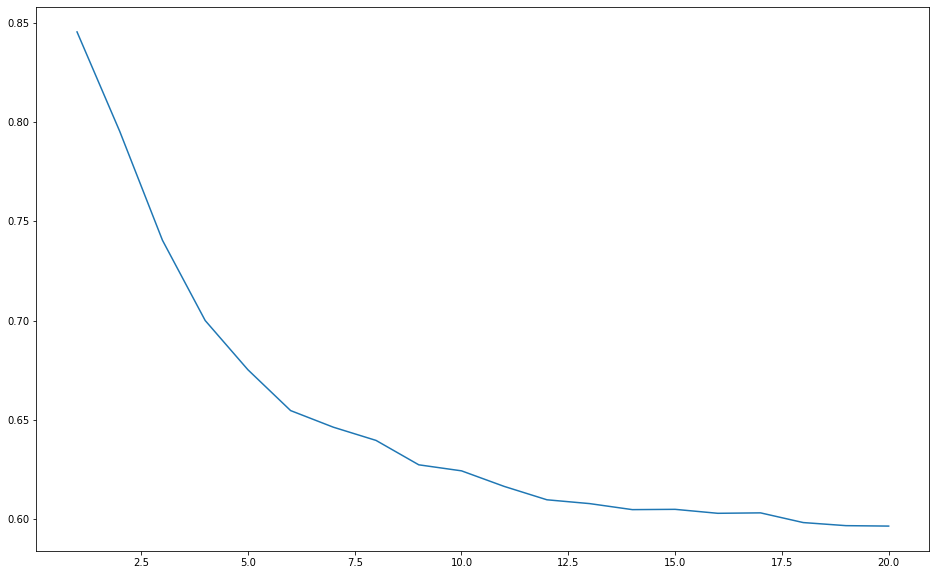

In [38]:
plt.figure(figsize=(16, 10))
plt.plot(dfknn, scalex=range(1,21))
